# 아이리스 다중 분류+추가callbacks+history

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# 실행할때마다 같은 결과를 출력하기 위한 seed값설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(iris.target)
y_one_hot[:3] #3개만확인 원핫잘됐는지

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(iris.data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, stratify=y_one_hot, random_state=seed
)
X_train.shape, X_test.shape
#((112, 4), (38, 4))

((112, 4), (38, 4))

### 모델정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, input_shape=(4,), activation='relu'),#컬럼4개들어와서 16레이어
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')#클래스갯수3개
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', #다중분류
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델저장관련 환경설정
import os #디렉토리명령어
MODEL_DIR = './model/' #모델디렉토리
if not os.path.exists(MODEL_DIR):#없으면만들어라
    os.mkdir(MODEL_DIR)

In [ ]:
!ls -l

total 68
drwxr-xr-x 2 root root 61440 Feb 10 04:54 model
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data


In [ ]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
#monitor='val_loss' 4가지중선택가능
#verbose=1 최소한보여줌/ 0안보여줌/ 2다보여줌
#save_best_only=True 물어보고이전보다좋으면저장, 아니면 모두다저장함;
# 자동 중단 설정

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, batch_size=30,
                    verbose=0, callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 1.00710, saving model to ./model/best001-1.0071.hdf5

Epoch 00002: val_loss improved from 1.00710 to 0.99673, saving model to ./model/best002-0.9967.hdf5

Epoch 00003: val_loss improved from 0.99673 to 0.98645, saving model to ./model/best003-0.9864.hdf5

Epoch 00004: val_loss improved from 0.98645 to 0.97625, saving model to ./model/best004-0.9763.hdf5

Epoch 00005: val_loss improved from 0.97625 to 0.96566, saving model to ./model/best005-0.9657.hdf5

Epoch 00006: val_loss improved from 0.96566 to 0.95578, saving model to ./model/best006-0.9558.hdf5

Epoch 00007: val_loss improved from 0.95578 to 0.94542, saving model to ./model/best007-0.9454.hdf5

Epoch 00008: val_loss improved from 0.94542 to 0.93624, saving model to ./model/best008-0.9362.hdf5

Epoch 00009: val_loss improved from 0.93624 to 0.92652, saving model to ./model/best009-0.9265.hdf5

Epoch 00010: val_loss improved from 0.92652 to 0.91765, saving model to ./model/best010-0.9177

In [ ]:
#잘못된평가? 베스트모델로한것이아님
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')
#1.000

2/2 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 1.0000
Accuracy: 1.0000


In [ ]:
#베스트모델로평가해도 1.000같다/은닉층을추가하니 더 좋아졌다. 
from tensorflow.keras.models import load_model

best_model = load_model('./model/best570-0.1207.hdf5') 
acc = best_model.evaluate(X_test, y_test) 
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 1.0000
Accuracy: 1.0000


### 학습과정시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_vloss=history.history['val_loss'] # y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_acc=history.history['accuracy'] # y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_vacc=history.history['val_accuracy']
y_loss=history.history['loss']

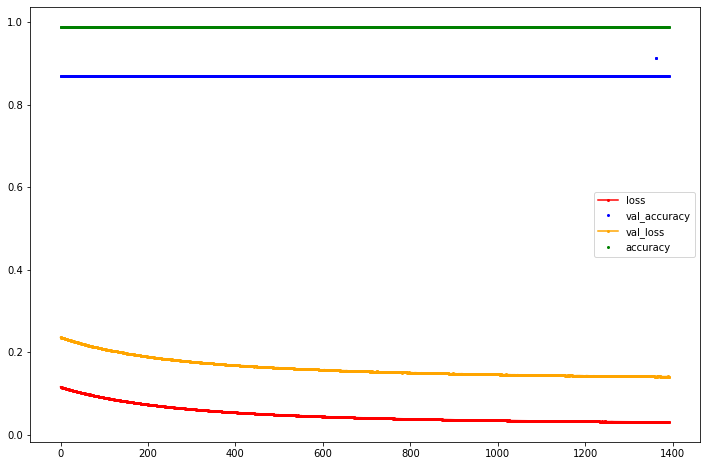

In [ ]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o-", c="red", markersize=2, label='loss')
plt.plot(x_len, y_vacc, "o", c="blue", markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, "o-", c="orange", markersize=2, label='val_loss')
plt.plot(x_len, y_acc, "o", c="green", markersize=2, label='accuracy')
plt.legend()
plt.show()